# Regresión lineal univariable #

### Predicción de precios de casas con la implementación de un modelo de regresión lineal ###

El presente proyecto consiste en realizar un modelo de de regresión lineal univariable para la predicción de precios de apartamentos. La implementación del modelo será totalmente manual, sin utilizar Scikit-learn para su entrenamiento. 


### Modelo de regresión lineal ###

Un modelo de regresión lineal busca encontrar la ecuación lineal que minimice el error cuadrado medio.

La ecuación lineal:

$f(x) = y = mx + b$

donde: 

$y$ : Variable dependiente
$x$ : Variable independiente
$m$ : Pendiente
$b$ : Intercepto

Función de costo:

$f(m,b) = \frac{1}{2} \sum_{i=1}^{n} (y_{i}−(mx_{i}+b))^2$

donde:

* $y_{i}$ : Valor real de cada dato en el dataset
* $mx_{i}+b$ : Valor predecido por el modelo

Para poder optimizar este modelo es necesario encontrar los valores de $m$ y $b$ que minimizan la función de costo.
Esto se realiza a través de un aprendizaje por medio de *gradient descent*.

<img src="regresionlineal.png"
     alt="regresionlineal"
     style="float: left; margin-right: 10px;" />




In [4]:
# Importación de librerías a utilizar

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sklearn
import seaborn as sb

In [16]:
#Cargar dataset

df = np.load('proyecto_training_data.npy')

#Convertir dataset en un DataFrame de Pandas

df = pd.DataFrame(data = df, columns = ["SalePrice", "OverallQual","1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"])

#Información básica de dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
SalePrice       1460 non-null float64
OverallQual     1460 non-null float64
1stFlrSF        1460 non-null float64
TotRmsAbvGrd    1460 non-null float64
YearBuilt       1460 non-null float64
LotFrontage     1201 non-null float64
dtypes: float64(6)
memory usage: 68.5 KB


In [26]:
#Conversión de todos los datos excepto LotFrontage a tipo int

df = df.astype({"SalePrice" : int, "OverallQual" : int, "1stFlrSF" : int, "TotRmsAbvGrd" : int, "YearBuilt" : int})

#Preview de dataframe

df.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500,7,856,8,2003,65.0
1,181500,6,1262,6,1976,80.0
2,223500,7,920,6,2001,68.0
3,140000,7,961,7,1915,60.0
4,250000,8,1145,9,2000,84.0


In [43]:
#Split de datos de entrenamiento y test

#Random seed para reproducibilidad de los resultados

np.random.seed(42)

# Shuffle de datos
df = df.sample(frac=1)

#Training and test split
train = int(0.8 * len(df))

dftrain = df[:train]

dftest = df[:-train]

print('Longitud de set de entrenamiento: ',len(dftrain), ', Longitud de set de prueba: ', len(dftest))

Longitud de set de entrenamiento:  1168 , Longitud de set de prueba:  292


In [90]:
#Análisis exploratorio de datos



for i in range(6):
    x = np.array(df.iloc[:,[i]])
    x = x[~np.isnan(x)]
    print("Media de ", list(df.iloc[[],[i]]), "es" ,np.mean(x))
    print("Valor maximo de ", list(df.iloc[[],[i]]), "es" ,np.max(x))
    print("Valor mínimo de  ", list(df.iloc[[],[i]]), "es" ,np.min(x))
    print("Rango de ", list(df.iloc[[],[i]]), "es" ,np.max(x)-np.min(x))
    print("Desviación estándar de  ", list(df.iloc[[],[i]]), "es" ,np.std(x))
    print("**************************************************************************************************")


Media de  ['SalePrice'] es 180921.19589041095
Valor maximo de  ['SalePrice'] es 755000
Valor mínimo de   ['SalePrice'] es 34900
Rango de  ['SalePrice'] es 720100
Desviación estándar de   ['SalePrice'] es 79415.29188606751
**************************************************************************************************
Media de  ['OverallQual'] es 6.0993150684931505
Valor maximo de  ['OverallQual'] es 10
Valor mínimo de   ['OverallQual'] es 1
Rango de  ['OverallQual'] es 9
Desviación estándar de   ['OverallQual'] es 1.3825228366585953
**************************************************************************************************
Media de  ['1stFlrSF'] es 1162.626712328767
Valor maximo de  ['1stFlrSF'] es 4692
Valor mínimo de   ['1stFlrSF'] es 334
Rango de  ['1stFlrSF'] es 4358
Desviación estándar de   ['1stFlrSF'] es 386.45532230228963
**************************************************************************************************
Media de  ['TotRmsAbvGrd'] es 6.517808219178082
Va

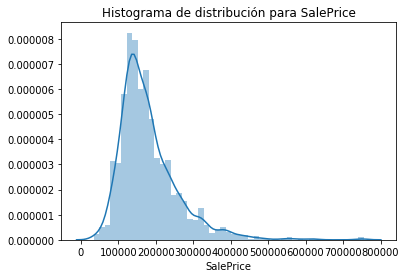

In [104]:
#Histograma para SalePrice

sb.distplot(df["SalePrice"]).set_title("Histograma de distribución para SalePrice")
plt.show()

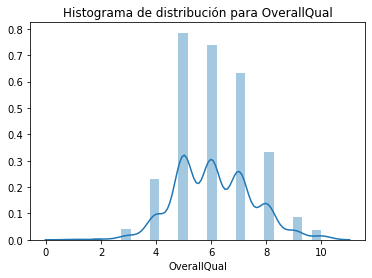

In [106]:
#Histograma para OverwallQual

sb.distplot(df["OverallQual"]).set_title("Histograma de distribución para OverallQual")
plt.show()

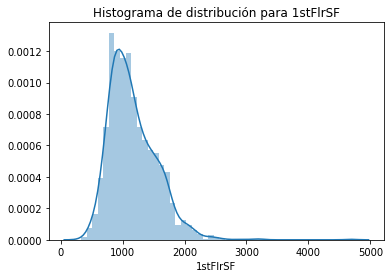

In [103]:
#Histograma para 1stFlrSF

sb.distplot(df["1stFlrSF"]).set_title("Histograma de distribución para 1stFlrSF")
plt.show()

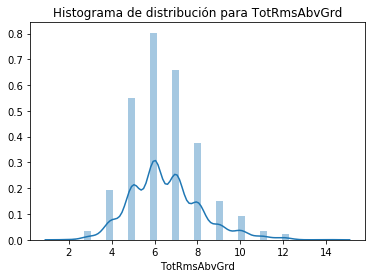

In [109]:
#Histograma para TotRmsAbvGrd
sb.distplot(df["TotRmsAbvGrd"]).set_title("Histograma de distribución para TotRmsAbvGrd")
plt.show()

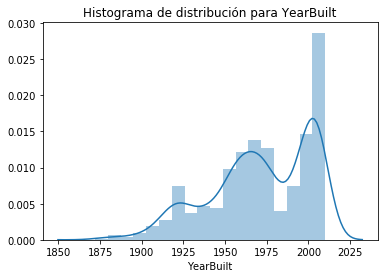

In [108]:
#Histograma para YearBuilt

sb.distplot(df["YearBuilt"]).set_title("Histograma de distribución para YearBuilt")
plt.show()

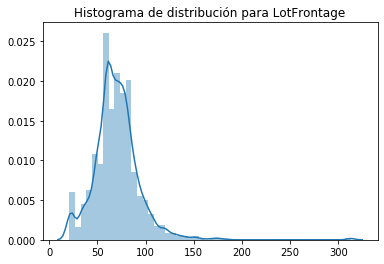

In [111]:
#Histograma para LotFrontage

x = np.array(df["LotFrontage"])
x = x[~np.isnan(x)]


sb.distplot(x).set_title("Histograma de distribución para LotFrontage")
plt.show()

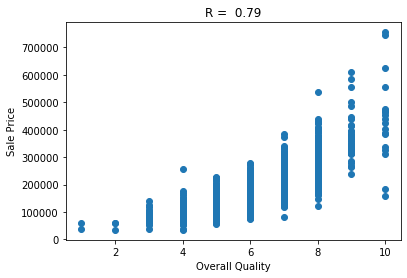

In [142]:
#Coeficiente correlación y scatter plot para variables independientes vs SalePrice

corr = round(df['SalePrice'].corr(df['OverallQual']),2)
title = "R =  " + str(corr)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df["OverallQual"], df["SalePrice"])
ax.set_xlabel("Overall Quality")
ax.set_ylabel("Sale Price")
ax.set_title(title)
plt.show()


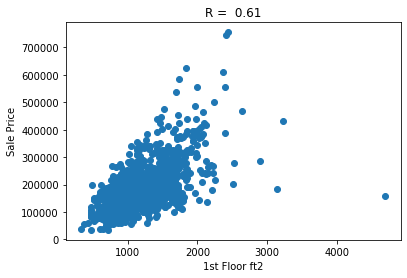

In [143]:
corr = round(df['SalePrice'].corr(df['1stFlrSF']),2)
title = "R =  " + str(corr)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df["1stFlrSF"], df["SalePrice"])
ax.set_xlabel("1st Floor ft2")
ax.set_ylabel("Sale Price")
ax.set_title(title)
plt.show()

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
1298     160000           10      4692            12       2008        313.0


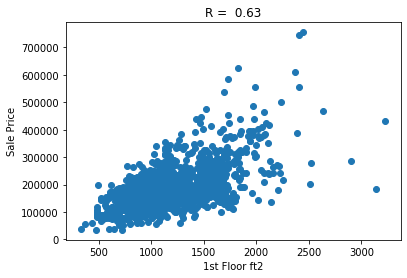

In [153]:
outlier = df.loc[df['1stFlrSF'] == np.max(df['1stFlrSF'])]
print(outlier)
df1 = df.drop([1298])

corr = round(df1['SalePrice'].corr(df1['1stFlrSF']),2)
title = "R =  " + str(corr)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df1["1stFlrSF"], df1["SalePrice"])
ax.set_xlabel("1st Floor ft2")
ax.set_ylabel("Sale Price")
ax.set_title(title)
plt.show()


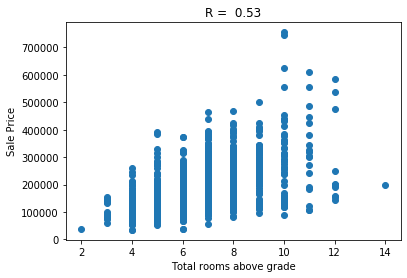

In [144]:
corr = round(df['SalePrice'].corr(df['TotRmsAbvGrd']),2)
title = "R =  " + str(corr)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df["TotRmsAbvGrd"], df["SalePrice"])
ax.set_xlabel("Total rooms above grade")
ax.set_ylabel("Sale Price")
ax.set_title(title)
plt.show()

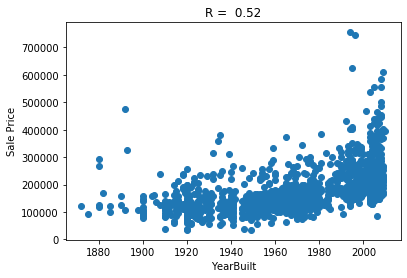

In [145]:
corr = round(df['SalePrice'].corr(df['YearBuilt']),2)
title = "R =  " + str(corr)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df["YearBuilt"], df["SalePrice"])
ax.set_xlabel("YearBuilt")
ax.set_ylabel("Sale Price")
ax.set_title(title)
plt.show()

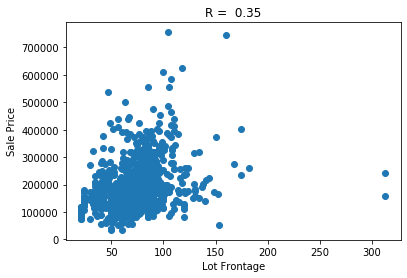

In [146]:
corr = round(df['SalePrice'].corr(df['LotFrontage']),2)
title = "R =  " + str(corr)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df["LotFrontage"], df["SalePrice"])
ax.set_xlabel("Lot Frontage")
ax.set_ylabel("Sale Price")
ax.set_title(title)
plt.show()

### Variables a utilizar para el modelo de regresión lineal ###

Según el análisis exploratorio de datos las variables que se utilizarán para crear los modelos de regresión lineal son:
* ***1stFlrSF*** con un $R = 0.63$
* ***OverallQual*** con un $R = 0.79$

Para la variable ***1stFlrSF*** se decidió quitar un outlier, con lo cual el valor de $R$ incrementó de $0.61$ a $0.63$.

Se utilizará el dataframe sin el valor extremo para hacer el modelo de ***1stFlrSF*** vs. ***SalePrice***.